In [85]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import math

A. Задача 1.

Оцените среднее время, которое тратит курьер, чтобы доставить заказ от лавки до клиента. Можно считать, что заказы распределены равномерно по всей территории доставки и находятся на расстонии не более 999м от njxrb. Курьер движется со скоростью 1 м/с и доставляет только 1 заказ за раз. Ответ привести в секундах, округлив, при необходимости, вверх до ближайшего целого.

In [86]:
R = 999
v = 1

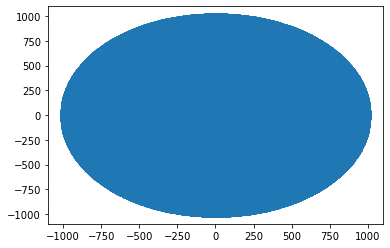

In [89]:
K = 1000000
x = sps.uniform(loc=-R, scale=2*R).rvs(size=K)
y = sps.uniform(loc=-R, scale=2*R).rvs(size=K)
df = pd.DataFrame({"x":x, "y":y})

df['in'] = (df['x']**2+df['y']**2) <= R**2
df = df[df['in'] == True]
plt.scatter(data=df, x='x', y='y')

df['distance'] = (df['x']**2+df['y']**2).apply(math.sqrt)

In [90]:
count_order = len(df['distance'])
sum_distance = df['distance'].sum()

avg_time = (sum_distance/v)/count_order

print(f"Average time to deliver for speed={v}m/s and max_distance={R}: {avg_time:.2f}s")


Average time to deliver for speed=1m/s and max_distance=999: 665.79s


In [78]:
N = 2021
M = 1500

Задача 2.

У дома есть N подъездов, у каждого подъезда стоит один пассажир и ждет такси. M таксистов по очереди приезжают к случайному подъезду. Найдите среднее число таксистов, которые уедут без пассажира. Ответ дайте для значения N=2021 и M=1500, округлите до целых.

In [83]:
import math
import numpy as np
from scipy.special import comb

f = math.factorial

def C_n_k_old(n, k):
    return f(n) \
           // f(k) \
           // f(n-k)

def C_rep_n_k_old(n, k):
    if n < 1:
        return 0
    return f(n+k-1) \
            // f(k) \
           // f(n-1)

def C_n_k(n, k):
    return comb(n, k, exact=True)

def C_rep_n_k(n, k):
    return comb(n, k, exact=True, repetition=True)

# p[m] - вер-ть что m таксистов уедут с пассажирами
# p[m] - и она же вер-ть что M-m таксистов уедут без пассажиров
p = np.zeros(M+1)

all = C_rep_n_k(N, M)

for m in range(M+1):
    c1 = C_n_k(N, m)
    c2 = C_rep_n_k(m, M-m)

    # print(f"m: {m}, c1: {c1}, c2: {c2}, all: {all}")
    p[m] = c1*c2 / all


P = 0
for i in range(len(p)):
    # P += (i)*p[i]
    # print(i,p[i])
    P += (M-i)*p[i]
    print(M-i,p[i])

print(f"Mean count of drivers without passangers: {P:.2f}")

1500 0.0
1499 0.0
1498 0.0
1497 0.0
1496 0.0
1495 0.0
1494 0.0
1493 0.0
1492 0.0
1491 0.0
1490 0.0
1489 0.0
1488 0.0
1487 0.0
1486 0.0
1485 0.0
1484 0.0
1483 0.0
1482 0.0
1481 0.0
1480 0.0
1479 0.0
1478 0.0
1477 0.0
1476 0.0
1475 0.0
1474 0.0
1473 0.0
1472 0.0
1471 0.0
1470 0.0
1469 0.0
1468 0.0
1467 0.0
1466 0.0
1465 0.0
1464 0.0
1463 0.0
1462 0.0
1461 0.0
1460 0.0
1459 0.0
1458 0.0
1457 0.0
1456 0.0
1455 0.0
1454 0.0
1453 0.0
1452 0.0
1451 0.0
1450 0.0
1449 0.0
1448 0.0
1447 0.0
1446 0.0
1445 0.0
1444 0.0
1443 0.0
1442 0.0
1441 0.0
1440 0.0
1439 0.0
1438 0.0
1437 0.0
1436 0.0
1435 0.0
1434 0.0
1433 0.0
1432 0.0
1431 0.0
1430 0.0
1429 0.0
1428 0.0
1427 0.0
1426 0.0
1425 0.0
1424 0.0
1423 0.0
1422 0.0
1421 0.0
1420 0.0
1419 0.0
1418 0.0
1417 0.0
1416 0.0
1415 0.0
1414 0.0
1413 0.0
1412 0.0
1411 0.0
1410 0.0
1409 0.0
1408 0.0
1407 0.0
1406 0.0
1405 0.0
1404 0.0
1403 0.0
1402 0.0
1401 0.0
1400 0.0
1399 0.0
1398 0.0
1397 0.0
1396 0.0
1395 0.0
1394 0.0
1393 0.0
1392 0.0
1391 0.0
1390 0.0
1

С. Задача 3.
В театре два входа: правый и левый. Каждый посетитель театра случайно решает, в какой из входов он войдет (подбрасывает монетку: орел направо, решка налево). В театре 400 мест. Каждое представление они заполняются полностью. Напротив каждого из входов расположен гардероб. Каждый посетитель пытается сдать куртку в гардеробе напротив входа, через который он вошел. Если он обнаруживет, что гардероб уже переполнен, он очень расстраивается. Такой ситуации мы хотим избежать. Сколько минимум мест должно быть в каждом из гардеробов, чтобы в среднем хотя бы в 19 из 20 представлений ни один из гардеробов не переполнялся.

D. Задача 4.

| Ограничения  |   |
| ------ | ------ |
|Ограничение времени|1 секунда|
|Ограничение памяти	|64Mb|
|Ввод	|стандартный ввод или input.txt|
|Вывод	|стандартный вывод или output.txt|

Условие Дан массив, состоящий из букв 'X', 'Y' и 'O'. Необходимо найти кратчайшее расстояние между буквами 'X' и 'Y', либо вывести 0, если 'X' либо 'Y' отсутствуют. Примечания дистанция между двумя рядом стоящими буквами считается как 1 (одно межбуквенное расстояние) дистанция может считаться в обе стороны

Пример входного файла input.txt

"OOOXOOYOXO"

Пример выходного файла output.txt

2

In [2]:
with open('input.txt') as f, open('output.txt', 'w') as g:
    l = f.readline().rstrip()
    x_i = -1
    y_i = -1
    min_s = len(l)
    for i in range(len(l)):
        if l[i] == 'O':
            continue
        if l[i] == 'X':
            x_i = i
            if y_i != -1:
                min_s = min(min_s, x_i-y_i)
        if l[i] == 'Y':
            y_i = i
            if x_i != -1:
                min_s = min(min_s, y_i-x_i)
    if min_s == len(l):
        min_s = 0
    g.write(str(min_s)+"\n")

E. Задача 5.

| Ограничения  |   |
| ------ | ------ |
|Ограничение времени|3 секунда|
|Ограничение памяти	|64Mb|
|Ввод	|стандартный ввод или input.txt|
|Вывод	|стандартный вывод или output.txt|

Дано N отрезков (3 <= N <= 100 000). Необходимо выбрать среди них такие (от 3 до N), чтобы сумма их длин получилась максимальной, но при этом из трех любых среди них можно было составить треугольник. В ответе выведите получившуюся сумму длин выбранных отрезков или 0, если таковых не существует.

Пример входного файла input.txt

3 2 5 4 1

Пример выходного файла output.txt

12